In [1]:
import sklearn as sk

In [2]:
import sklearn as sk
import rdkit as rd
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt

In [3]:
suppl = rd.Chem.SDMolSupplier('../../../data/HTBCFiles/ChemDivFull.sdf')

In [4]:
# Extract only the 960 tested molecules
plates = ["CDIV%04d"%p for p in range(1,121,10)]
print(len(plates),plates)

12 ['CDIV0001', 'CDIV0011', 'CDIV0021', 'CDIV0031', 'CDIV0041', 'CDIV0051', 'CDIV0061', 'CDIV0071', 'CDIV0081', 'CDIV0091', 'CDIV0101', 'CDIV0111']


In [5]:
tested = [x for x in suppl if x.GetProp("BATCH_PLATE") in plates]
print(len(suppl),len(tested))

50000 960


In [6]:
for mol in tested:
    if mol is None: continue
    plate=mol.GetProp("BATCH_PLATE")
    plate=int(plate[5:])
    well=mol.GetProp("BATCH_WELL")
    name="%d%s"%(plate,well.replace('0',''))
    print(plate,well,name)
    mol.SetProp("NAME",name)

1 A02 1A2
1 A03 1A3
1 A04 1A4
1 A05 1A5
1 A06 1A6
1 A07 1A7
1 A08 1A8
1 A09 1A9
1 A10 1A1
1 A11 1A11
1 B02 1B2
1 B03 1B3
1 B04 1B4
1 B05 1B5
1 B06 1B6
1 B07 1B7
1 B08 1B8
1 B09 1B9
1 B10 1B1
1 B11 1B11
1 C02 1C2
1 C03 1C3
1 C04 1C4
1 C05 1C5
1 C06 1C6
1 C07 1C7
1 C08 1C8
1 C09 1C9
1 C10 1C1
1 C11 1C11
1 D02 1D2
1 D03 1D3
1 D04 1D4
1 D05 1D5
1 D06 1D6
1 D07 1D7
1 D08 1D8
1 D09 1D9
1 D10 1D1
1 D11 1D11
1 E02 1E2
1 E03 1E3
1 E04 1E4
1 E05 1E5
1 E06 1E6
1 E07 1E7
1 E08 1E8
1 E09 1E9
1 E10 1E1
1 E11 1E11
1 F02 1F2
1 F03 1F3
1 F04 1F4
1 F05 1F5
1 F06 1F6
1 F07 1F7
1 F08 1F8
1 F09 1F9
1 F10 1F1
1 F11 1F11
1 G02 1G2
1 G03 1G3
1 G04 1G4
1 G05 1G5
1 G06 1G6
1 G07 1G7
1 G08 1G8
1 G09 1G9
1 G10 1G1
1 G11 1G11
1 H02 1H2
1 H03 1H3
1 H04 1H4
1 H05 1H5
1 H06 1H6
1 H07 1H7
1 H08 1H8
1 H09 1H9
1 H10 1H1
1 H11 1H11
11 A02 11A2
11 A03 11A3
11 A04 11A4
11 A05 11A5
11 A06 11A6
11 A07 11A7
11 A08 11A8
11 A09 11A9
11 A10 11A1
11 A11 11A11
11 B02 11B2
11 B03 11B3
11 B04 11B4
11 B05 11B5
11 B06 11B6
11 B07 11B7

In [7]:
for x in tested[0].GetPropNames(includePrivate=True,includeComputed=True):
    print(x,mol.GetProp(x))

__computedProps [numArom,_StereochemDone,]
_Name 
_MolFileInfo   -ISIS-  01311913252D
_MolFileComments 
numArom 3
_StereochemDone 1
compound_Corp_Reg_Number STF-085941
rotatable_bonds 6.000000000000000e+000
BATCH_NUMBER 1
BATCH_MW 3.824600000000000e+002
BATCH_VENDOR_CATALOG 6024-0185
BATCH_PLATE CDIV0111
BATCH_WELL H11
LogP 5.249700000000000e+000
LogS -6.007000000000000e+000
H_Acceptors 4
H_Donors 1
AnlTst_Display NMR
BatAnl_Link D:\Spectra\FirstSide\10K\6024-0185.emf
VENDOR_DISPLAY ChemDiv
NAME 111H11


In [8]:
AllChem.Compute2DCoords(mol)

0

In [9]:
print(mol)

In [10]:
m2=rd.Chem.AddHs(mol)
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)
m2=rd.Chem.RemoveHs(m2)
img=Draw.MolsToGridImage([mol,m2],molsPerRow=2,subImgSize=(200,200),legends=["2d","3d"])
img.show()

AttributeError: 'Image' object has no attribute 'show'

In [11]:
print(img)

<IPython.core.display.Image object>


In [12]:
print(rd.Chem.MolToMolBlock(tested[1]))


     RDKit          2D

 20 22  0  0  0  0  0  0  0  0999 V2000
    0.5917   -1.2875    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0125   -0.4667    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5917   -1.2875    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0125   -2.0792    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.1167   -0.4042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9250   -0.7750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1167   -2.1375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9250   -1.7750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6250   -3.0167    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5917    0.4458    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5542    2.1417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0417    3.0250    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.5917    0.4083    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1167    1.2958    0

In [13]:
def getMol(mols,plate,well):
    mol=[x for x in mols if x.GetProp("BATCH_PLATE")=="CDIV%04d"%plate and x.GetProp("BATCH_WELL")==well]
    assert(len(mol)==1)
    return mol[0]

In [14]:
# Compare some molecules which give the same response
m91d2=getMol(tested,91,'D02')
m91e2=getMol(tested,91,"E02")
img=Draw.MolsToGridImage([m91d2,m91e2],molsPerRow=2,subImgSize=(200,200),legends=["91E2","91D2"])
img.show()

AttributeError: 'Image' object has no attribute 'show'

In [15]:
from rdkit.Chem import rdFMCS
res=rdFMCS.FindMCS([m91d2,m91e2])
res.smartsString

'[#6]12:[#6](:[#7]:[#6]3:[#7](:[#6]:1=[#8]):[#6]:[#6]:[#6]:[#6]:3):[#7](:[#6](:[#6](:[#6]:2)-[#6](=[#8])-[#7]-[#6])=[#7])-[#6]-[#6]-[#6]-[#8]-[#6]'

In [16]:
res

In [17]:
# Check chemical features
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
feats = [factory.GetFeaturesForMol(x) for x in [m91d2,m91e2]]

In [18]:
len(feats[1])

13

In [19]:
help(feats[0][0])

Help on MolChemicalFeature in module rdkit.Chem.rdMolChemicalFeatures object:

class MolChemicalFeature(Boost.Python.instance)
 |  Class to represent a chemical feature.
 |  These chemical features may or may not have been derived from molecule object;
 |  i.e. it is possible to have a chemical feature that was created just from its type
 |  and location.
 |  
 |  Method resolution order:
 |      MolChemicalFeature
 |      Boost.Python.instance
 |      builtins.object
 |  
 |  Static methods defined here:
 |  
 |  ClearCache(...)
 |      ClearCache( (MolChemicalFeature)arg1) -> None :
 |          Clears the cache used to store position information.
 |      
 |          C++ signature :
 |              void ClearCache(RDKit::MolChemicalFeature {lvalue})
 |  
 |  GetActiveConformer(...)
 |      GetActiveConformer( (MolChemicalFeature)arg1) -> int :
 |          Gets the conformer to use.
 |      
 |          C++ signature :
 |              int GetActiveConformer(RDKit::MolChemicalFeature {

In [20]:
for fs in feats:
    print("")
    for f in fs:
        print(f.GetFamily(),f.GetType(),f.GetAtomIds())


Donor SingleAtomDonor (11,)
Donor SingleAtomDonor (19,)
Acceptor SingleAtomAcceptor (2,)
Acceptor SingleAtomAcceptor (13,)
Acceptor SingleAtomAcceptor (15,)
Acceptor SingleAtomAcceptor (21,)
Aromatic Arom6 (0, 1, 5, 7, 8, 2)
Aromatic Arom6 (0, 1, 9, 4, 6, 3)
Aromatic Arom6 (7, 8, 14, 17, 16, 12)
Hydrophobe ThreeWayAttach (1,)
Hydrophobe ThreeWayAttach (4,)
Hydrophobe ChainTwoWayAttach (20,)

Donor SingleAtomDonor (13,)
Donor SingleAtomDonor (19,)
Acceptor SingleAtomAcceptor (2,)
Acceptor SingleAtomAcceptor (16,)
Acceptor SingleAtomAcceptor (17,)
Acceptor SingleAtomAcceptor (21,)
Aromatic Arom6 (0, 1, 6, 3, 8, 2)
Aromatic Arom6 (0, 1, 9, 5, 7, 4)
Aromatic Arom6 (3, 8, 12, 15, 14, 10)
Hydrophobe ThreeWayAttach (1,)
Hydrophobe ThreeWayAttach (5,)
Hydrophobe ThreeWayAttach (14,)
Hydrophobe ChainTwoWayAttach (20,)


In [21]:
# Generate pharmacophore fingerprints 
# from rdkit import Chem
# from rdkit.Chem import ChemicalFeatures
# fdefName = 'data/MinimalFeatures.fdef'
# featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [22]:
# from rdkit.Chem.Pharm2D.SigFactory import SigFactory
# sigFactory = SigFactory(featFactory,minPointCount=2,maxPointCount=3)
# sigFactory.SetBins([(0,2),(2,5),(5,8)])
# sigFactory.Init()
# sigFactory.GetSigSize()

In [23]:
# Generate RDK fingerprints
fp=[]
for m in [m91d2, m91e2]:
    fp.append(AllChem.RDKFingerprint(m, fpSize=2048))
print(fp)

[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x12587fe80>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0d4c0>]


In [24]:
help(fp[0])

Help on ExplicitBitVect in module rdkit.DataStructs.cDataStructs object:

class ExplicitBitVect(Boost.Python.instance)
 |  A class to store explicit bit vectors.
 |  
 |  This class is most useful for situations where the size of the vector
 |  is relatively small (tens of thousands or smaller).
 |  
 |  For larger vectors, use the _SparseBitVect_ class instead.
 |  
 |  As you would expect, _ExplicitBitVects_ support a set of binary operations
 |  so you can do things like:
 |    bv3 = bv1 & bv2  (bitwise and)
 |    bv3 = bv1 | bv2  (bitwise or)
 |    bv3 = bv1 ^ bv2  (bitwise xor)
 |    bv3 = ~bv1       (bitwise negation)
 |  
 |  Bits can be set and read using either the Set/UnsetBit() and GetBit() methods
 |  or by indexing (i.e. bv[i] = 1 or if bv[i]).
 |  
 |  Method resolution order:
 |      ExplicitBitVect
 |      Boost.Python.instance
 |      builtins.object
 |  
 |  Static methods defined here:
 |  
 |  FromBase64(...)
 |      FromBase64( (ExplicitBitVect)arg1, (str)arg2) -> 

In [25]:
d=(~fp[0]&~fp[1]).GetNumOnBits()
a=(fp[0]&~fp[1]).GetNumOnBits()
b=(~fp[0]&fp[1]).GetNumOnBits()
c=(fp[0]&fp[1]).GetNumOnBits()
print(a,b,c,d)
rd.DataStructs.FingerprintSimilarity(fp[0],fp[1])

0 18 1221 809


0.9854721549636803

In [26]:
# Setup fingerprints for all the molecules 
fp=[]
for m in tested:
    fp.append(AllChem.RDKFingerprint(m, fpSize=2048))
print(fp)


[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x12587fe80>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169a2b040>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0d4c0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0d700>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0d820>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0de80>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0d8e0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0d940>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0d9a0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0da00>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0da60>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0dac0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169e0db20>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x169

In [27]:
# Set categorization of molecules
# Property, HIT, will be set to true iff we found an aptamer for the molecule
import csv

allhits=[]
with open('../../../data/Hits/hasaptamer.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\tPlate {row[0]}, well {row[1]} is a hit.')
            line_count += 1
            allhits.append("%s%s"%(row[0],row[1]))
    print(f'Processed {line_count} hits.')
# Set HIT property
for t in tested:
    t.SetBoolProp("HIT",t.GetProp("NAME") in allhits)

Column names are Plate, Well, Fold
	Plate 1, well A4 is a hit.
	Plate 1, well F7 is a hit.
	Plate 101, well D7 is a hit.
	Plate 101, well E6 is a hit.
	Plate 101, well G6 is a hit.
	Plate 101, well H6 is a hit.
	Plate 111, well E3 is a hit.
	Plate 11, well D3 is a hit.
	Plate 21, well G8 is a hit.
	Plate 31, well B11 is a hit.
	Plate 31, well D8 is a hit.
	Plate 31, well E10 is a hit.
	Plate 31, well E3 is a hit.
	Plate 31, well E4 is a hit.
	Plate 31, well E7 is a hit.
	Plate 31, well E9 is a hit.
	Plate 41, well C7 is a hit.
	Plate 41, well D7 is a hit.
	Plate 41, well E10 is a hit.
	Plate 41, well F7 is a hit.
	Plate 41, well H10 is a hit.
	Plate 51, well B8 is a hit.
	Plate 51, well E9 is a hit.
	Plate 51, well G2 is a hit.
	Plate 51, well H8 is a hit.
	Plate 61, well C4 is a hit.
	Plate 61, well E4 is a hit.
	Plate 91, well A2 is a hit.
	Plate 91, well A3 is a hit.
	Plate 91, well B2 is a hit.
	Plate 91, well B3 is a hit.
	Plate 91, well C2 is a hit.
	Plate 91, well C3 is a hit.
	

In [28]:
# Set categorization of molecules
# Property, HIT, will be set to true iff we found an aptamer for the molecule
import csv
fold=[]
targets=[]
with open('../../../data/Hits/fold.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            aptamers=row[1:]
            line_count += 1
        else:
            line_count += 1
            fold.append([float(x) for x in row[1:]])
            targets.append(row[0])
    print(f'Processed {line_count} targets.')
print(targets)
# Set fold property
for t in tested:
    t.SetBoolProp("HIT",t.GetProp("NAME") in allhits)



Column names are Target, H960-266, H960-319, H960-281, H960-850, H960-892, H960-735, H960-425, H960-940, H960-613, H960-251, H960-003, H960-875, H960-650, H960-506, H960-172, H960-050, H960-594, H960-228, H960-488, H960-629, H960-668, H960-374, H960-561, H960-156, H960-922, H960-962, H960-843, H960-616, H960-617, H960-505, H960-072, H960-724, H960-315, H960-354, H960-939, H960-256, H960-920, H960-356, H960-198, H960-337, H960-540, NSRef-413, NSRef-630, NS-104, Amb-767, Amb-563, Amb-113, Amb-751, Amb-816, Amb-720, Amb-318, Amb-6319
Processed 102 targets.
['1A4', '1C5', '1C7', '1F7', '101B7', '101C7', '101D11', '101D7', '101D9', '101E10', '101E6', '101F11', '101F2', '101F7', '101G6', '101H6', '111E3', '111H2', '111H7', '11D3', '21G8', '31B11', '31B9', '31C10', '31C2', '31C3', '31C8', '31D4', '31D7', '31D8', '31E10', '31E3', '31E4', '31E7', '31E9', '31F10', '31H10', '41A11', '41C4', '41C5', '41C7', '41D10', '41D4', '41D7', '41E10', '41E2', '41E3', '41E4', '41E7', '41E9', '41F10', '41F2', 

In [29]:
# Setup ML input as X, output as Y
import numpy as np
X = np.array(list(fp))
from sklearn.preprocessing import StandardScaler
#st = StandardScaler()
#X = st.fit_transform(X)
y=[t.GetBoolProp("HIT") for t in tested]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print('Fraction hits: train: %.3f, test: %.3f'%(np.mean(y_train),np.mean(y_test)))


Fraction hits: train: 0.047, test: 0.042


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=15)
scores = cross_val_score(clf, X, y, cv=5)
np.mean(scores)

0.9635416666666667

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_predict=rfc.predict(X_test)
y_train_predict=rfc.predict(X_train)

0.7432065217391305

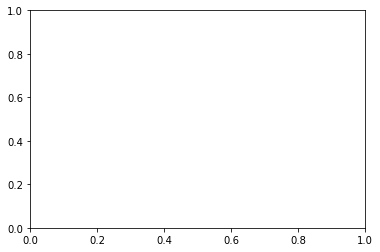

In [33]:
import matplotlib.pyplot as plt
import sklearn.metrics as sm

ax = plt.gca()
sm.roc_auc_score(y_test, y_predict)



In [34]:
print(sm.classification_report(y_test, y_predict))


              precision    recall  f1-score   support

       False       0.98      0.99      0.98       368
        True       0.62      0.50      0.55        16

    accuracy                           0.97       384
   macro avg       0.80      0.74      0.77       384
weighted avg       0.96      0.97      0.96       384



In [35]:
print(sm.confusion_matrix(y_test, y_predict))

[[363   5]
 [  8   8]]


In [36]:
print(sm.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       549
        True       1.00      1.00      1.00        27

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [37]:
print(sm.confusion_matrix(y_train, y_train_predict))

[[549   0]
 [  0  27]]


In [38]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_predict=lr.predict(X_test)
y_train_predict=lr.predict(X_train)

/Users/bst/miniforge3/envs/moldist/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(sm.classification_report(y_train, y_train_predict))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       549
        True       1.00      1.00      1.00        27

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



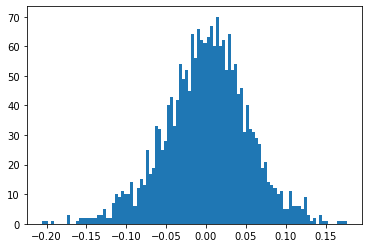

TypeError: interactive() missing 1 required positional argument: 'b'

In [40]:
lr.coef_.shape
plt.hist(lr.coef_[0],100)
plt.show()
plt.interactive()